# **3.1 Text Preprocessing, Tokenization, and Sequence Padding:**

In [1]:
!pip uninstall jax jaxlib

Found existing installation: jax 0.4.13
Uninstalling jax-0.4.13:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jax-0.4.13.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jax/*
Proceed (Y/n)? y
  Successfully uninstalled jax-0.4.13
Found existing installation: jaxlib 0.4.13
Uninstalling jaxlib-0.4.13:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jaxlib-0.4.13.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jaxlib/*
Proceed (Y/n)? y
  Successfully uninstalled jaxlib-0.4.13


In [2]:
!pip install numpy==1.23.5
!pip install gensim
!pip install jax==0.4.13
!pip install jaxlib==0.4.13

  Using cached jax-0.4.13-py3-none-any.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires jaxlib>=0.1.51, which is not installed.
optax 0.2.4 requires jaxlib>=0.4.27, which is not installed.
chex 0.1.89 requires jaxlib>=0.4.27, which is not installed.
optax 0.2.4 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.13 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.13 which is incompatible.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
  Using cached jaxlib-0.4.13-cp311-cp311-manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached jaxlib-0.4.13-cp311-cp311-manylinux2014_x86_64.whl (71.6 MB)
ERROR: pip's de

## **3.3.1 Loading Dataset**

In [4]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import is_sarcasticEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_dataset_path = '/content/drive/MyDrive/2025 - 6CS012 - AI and ML - Student/Collection of Dataset for Text Classification/8. Sarcastic or Not Sarcastic Dataset/sarcastic_headlines.csv'
test_dataset_path = '/content/drive/MyDrive/AI and ML/Assessment/Assessment_2/test_sarcastic_headlines.csv'

In [7]:
df = pd.read_csv(train_dataset_path)
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


from matplotlib import pyplot as plt
_df_0['is_sarcastic'].plot(kind='hist', bins=20, title='is_sarcastic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('headline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['is_sarcastic'].plot(kind='line', figsize=(8, 4), title='is_sarcastic')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['headline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='is_sarcastic', y='headline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
df[df['is_sarcastic'] == 1]['headline']

,headline
0,thirtysomething scientists unveil doomsday clo...
3,inclement weather prevents liar from getting t...
4,mother comes pretty close to using word 'strea...
7,richard branson's global-warming donation near...
8,shadow government getting too large to meet in...
...,...
28612,polish rapper under fire for use of the word '...
28614,jews to celebrate rosh hashasha or something
28615,internal affairs investigator disappointed con...
28617,mars probe destroyed by orbiting spielberg-gat...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      28619 non-null  object
 1   is_sarcastic  28619 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


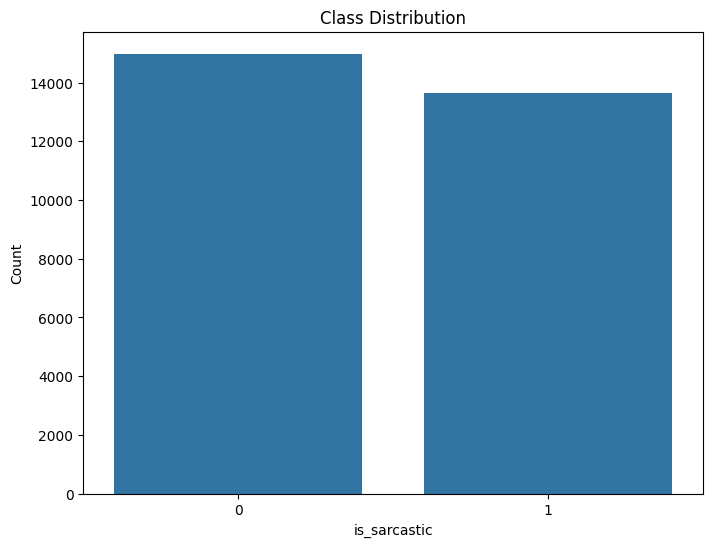

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_sarcastic')
plt.title("Class Distribution")
plt.xlabel("is_sarcastic")
plt.ylabel("Count")
plt.show()

In [11]:
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


## **3.1.2 Data Cleaning and Normalization**

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

slang_dict = {
    "gr8": "great",
    "b4": "before",
    "u": "you",
    "ur": "your",
    "r": "are",
    "lol": "laugh",
    "omg": "oh my god",
    "idk": "i do not know",
    "btw": "by the way"
}

def preprocess_text(text):
    contractions = {
        "won't": "will not", "can't": "can not",
        "n't": " not", "'re": " are", "'s": " is",
        "'d": " would", "'ll": " will", "'t": " not",
        "'ve": " have", "'m": " am"
    }

    for pattern, repl in contractions.items():
        text = re.sub(pattern, repl, text)

    text = re.sub(r'\buser\w*\b', '', text, flags=re.IGNORECASE)

    text = text.lower()

    for slang, full in slang_dict.items():
        text = re.sub(r'\b' + re.escape(slang) + r'\b', full, text)

    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[@#]', '', text)

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(' ', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

In [14]:
df

,headline,is_sarcastic,cleaned_headline
0,thirtysomething scientists unveil doomsday clo...,1,thirtysomething scientist unveil doomsday cloc...
1,dem rep. totally nails why congress is falling...,0,dem rep totally nail congress falling short ge...
2,eat your veggies: 9 deliciously different recipes,0,eat veggie deliciously different recipe
3,inclement weather prevents liar from getting t...,1,inclement weather prevents liar getting work
4,mother comes pretty close to using word 'strea...,1,mother come pretty close using word istreaming...
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,jew celebrate rosh hashasha something
28615,internal affairs investigator disappointed con...,1,internal affair investigator disappointed cons...
28616,the most beautiful acceptance speech this week...,0,beautiful acceptance speech week came queer ko...
28617,mars probe destroyed by orbiting spielberg-gat...,1,mar probe destroyed orbiting spielberggates sp...


## **3.1.3 Visualize the cleaned data**

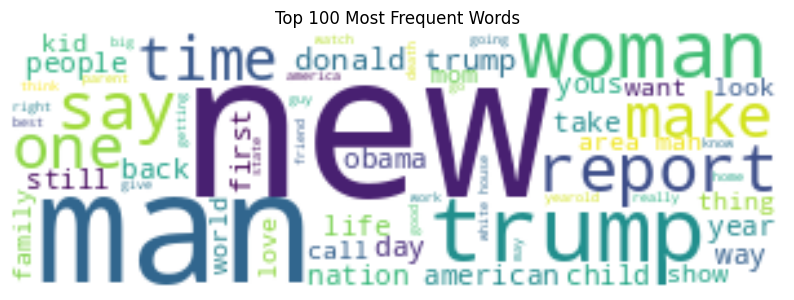

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['cleaned_headline'])

wordcloud = WordCloud(
    width=300,
    height=100,
    background_color='white',
    max_words=100
).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Frequent Words')
plt.show()

## **3.1.4 Train Test Split**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_headline'],
    df['is_sarcastic'],
    test_size=0.2,
    random_state=42
)

## **3.1.5 Tokenization and Padding**

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [18]:
X_train_seq

[[2, 60, 188, 604, 22, 4186, 10, 1380],
 [3113, 62, 1380, 1319, 112, 171, 56, 3114, 4757, 518],
 [4758, 1505, 42, 455, 227],
 [380, 1717, 767, 2691, 6633, 2876],
 [4759, 199, 113, 319, 768, 456, 19, 113, 300],
 [6634, 3740, 6635, 5500, 1718, 1031, 3411, 1719, 3741, 1075, 769],
 [157, 5501, 1, 1124, 3742, 1642],
 [1320, 743, 18, 2, 1, 90, 184],
 [6636, 1381, 4760, 2493, 3115],
 [1914, 11, 64, 770, 152, 36, 820, 1720, 8433],
 [6637, 4761, 2494, 1, 3116, 2319],
 [6638, 5502, 5503, 1261, 1262, 4187, 1124],
 [1458, 1506, 242, 49, 97, 998, 289, 93],
 [412, 1076, 250, 623, 3743, 2320],
 [340, 3117, 3744, 353, 132, 6639, 1032],
 [444, 1382, 573, 1033, 3745, 1212, 1507, 273, 1570, 847],
 [3746, 30, 232, 4188, 3118, 1, 1],
 [3747, 8434, 1721, 664, 8435, 1, 5504, 8436, 445],
 [1383, 1915, 5505, 519, 1263, 1722],
 [17, 1262, 8437, 520],
 [4762, 999, 2692, 1, 5506, 1, 413],
 [3412, 23, 2321, 446, 8438, 46, 19, 472, 1213],
 [19, 5507, 235],
 [2693, 91, 2, 357, 1571, 2694, 5, 767],
 [49, 80, 27, 1508

In [19]:
max_len = max(len(seq) for seq in X_train_seq)

In [20]:
max_len

26

In [21]:
# max lenght for the validation
max_len_test = max(len(seq) for seq in X_test_seq)
max_len_test

106

In [22]:
import numpy as np
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))

In [23]:
X_train_pad = pad_sequences(X_train_seq, maxlen=25, padding='post', truncating='post')

X_test_pad = pad_sequences(X_test_seq, maxlen=25, padding='post', truncating='post')

In [24]:
X_train_pad.shape

(22895, 25)

# **3.2 Model Building and Trasining**

## **3.2.1 Simple Recurrent Neural Network**

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# vocab size
vocab_size = 10000
# embedded vector lenght
embedding_dim = 100
# max input sequences
max_length = 25
rnn_units = 64

model = Sequential([

    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim),

    SimpleRNN(units=rnn_units,
              return_sequences=False),

    Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, max_length))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 25, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,625 (3.86 MB)

 Trainable params: 1,010,625 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [28]:
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 0.9547539616346956, 1: 1.049747822099954}

In [29]:
print("Training Model 1: Simple RNN")
history1 = model.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    class_weight = class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Training Model 1: Simple RNN
Epoch 1/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6837 - loss: 0.5775 - val_accuracy: 0.7956 - val_loss: 0.4455
Epoch 2/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9079 - loss: 0.2396 - val_accuracy: 0.7891 - val_loss: 0.5106
Epoch 3/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9653 - loss: 0.1035 - val_accuracy: 0.7773 - val_loss: 0.6488
Epoch 4/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9830 - loss: 0.0515 - val_accuracy: 0.7620 - val_loss: 0.8116


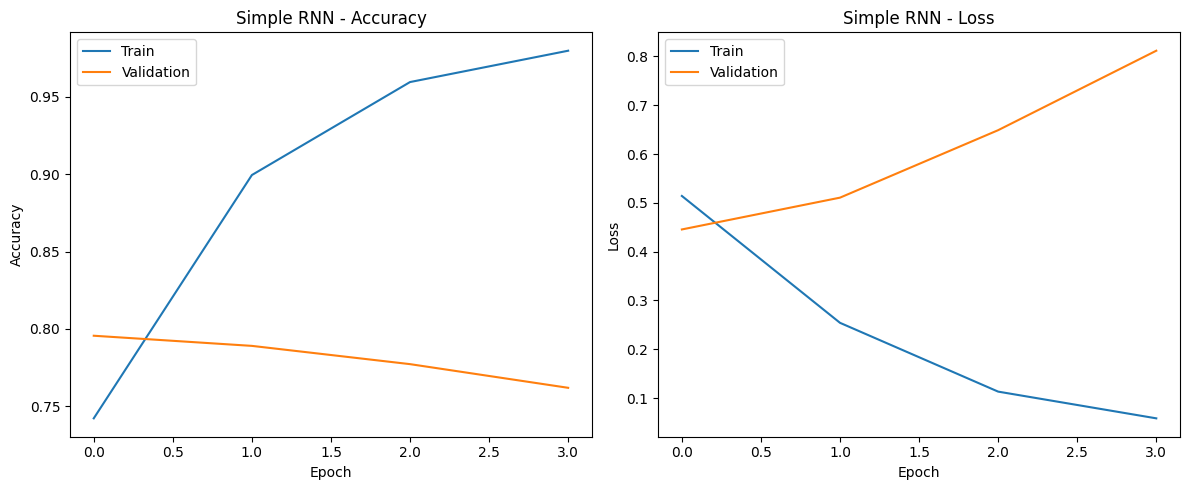

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Simple RNN - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title(f'Simple RNN - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

Evaluating Model 1: Simple RNN
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Model 1: Simple RNN Accuracy: 0.7973


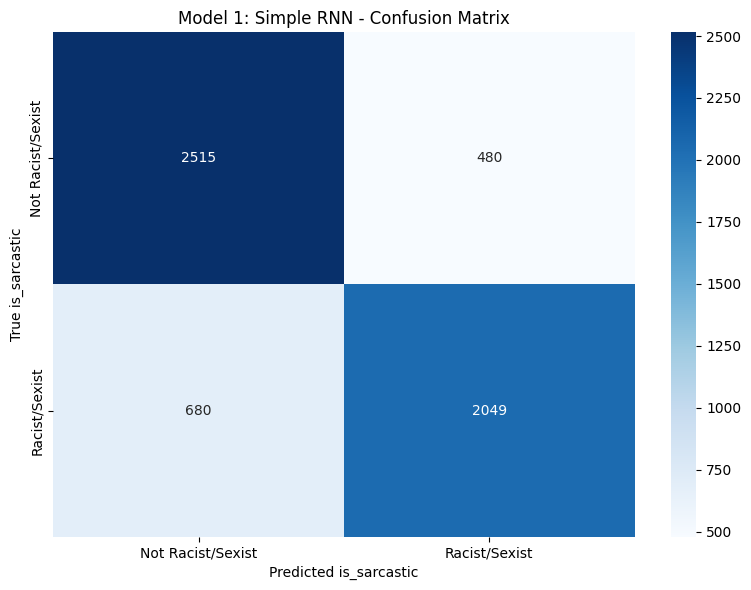


Model 1: Simple RNN Classification Report:
                   precision    recall  f1-score   support

Not Racist/Sexist       0.79      0.84      0.81      2995
    Racist/Sexist       0.81      0.75      0.78      2729

         accuracy                           0.80      5724
        macro avg       0.80      0.80      0.80      5724
     weighted avg       0.80      0.80      0.80      5724



In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Racist/Sexist', 'Racist/Sexist'],
                yticklabels=['Not Racist/Sexist', 'Racist/Sexist'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True is_sarcastic')
    plt.xlabel('Predicted is_sarcastic')
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred,
                               target_names=['Not Racist/Sexist', 'Racist/Sexist']))

    return accuracy, y_pred

# Evaluate each model
print("Evaluating Model 1: Simple RNN")
acc1, pred1 = evaluate_model(model, X_test_pad, y_test, "Model 1: Simple RNN")


## **3.2.2 Simple LSTM**

In [32]:
simple_lstm = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim),

    LSTM(units=64,
         dropout=0.2,
         recurrent_dropout=0.2),

    Dense(1, activation='sigmoid')
])

simple_lstm.build(input_shape=(None, max_length))

simple_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 25, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
simple_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [34]:
history2 = simple_lstm.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    class_weight = class_weights_dict,
    verbose=1
)

Epoch 1/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.5966 - loss: 0.6376 - val_accuracy: 0.7852 - val_loss: 0.4495
Epoch 2/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.8505 - loss: 0.3611 - val_accuracy: 0.7991 - val_loss: 0.4576
Epoch 3/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9005 - loss: 0.2643 - val_accuracy: 0.7825 - val_loss: 0.4753
Epoch 4/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9179 - loss: 0.2261 - val_accuracy: 0.7939 - val_loss: 0.5719


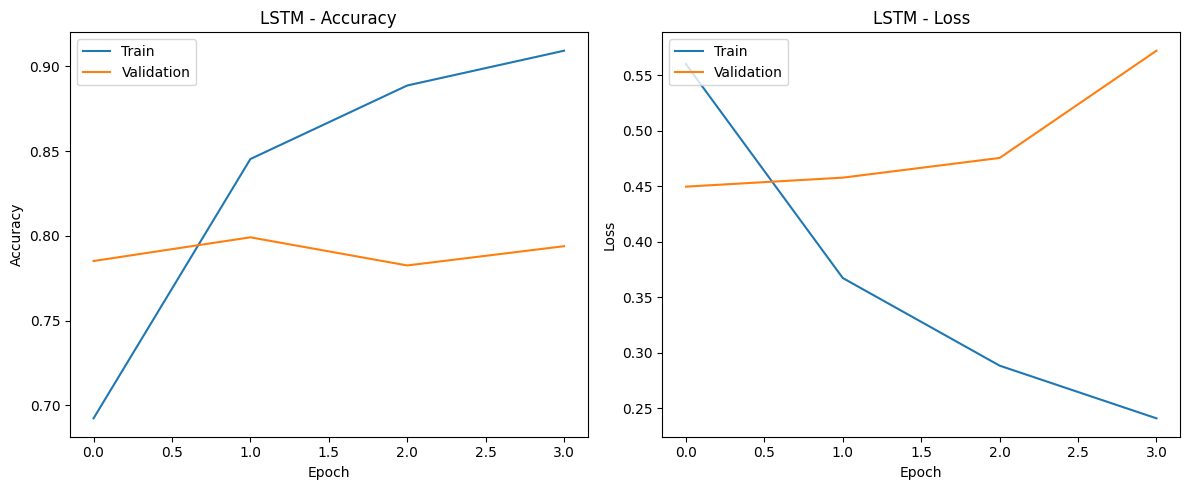

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('LSTM - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title(f'LSTM - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


Evaluating Model 2: LSTM
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Model 2: LSTM Accuracy: 0.7897


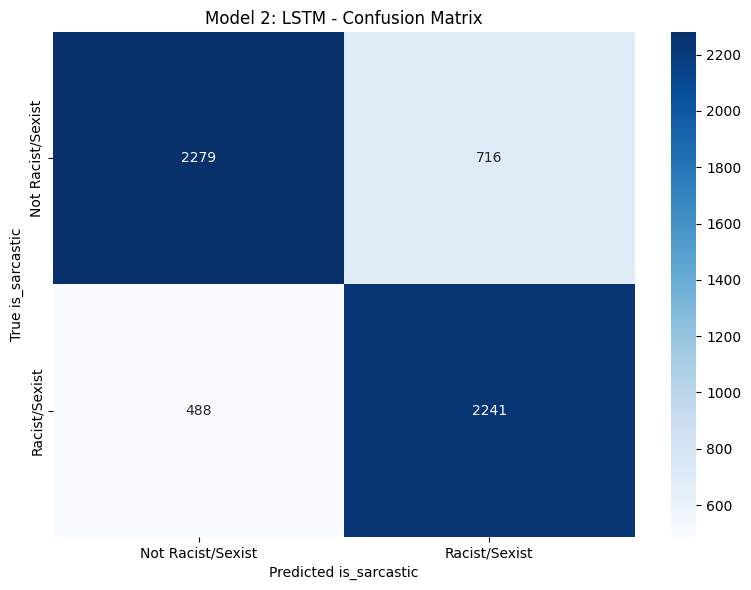


Model 2: LSTM Classification Report:
                   precision    recall  f1-score   support

Not Racist/Sexist       0.82      0.76      0.79      2995
    Racist/Sexist       0.76      0.82      0.79      2729

         accuracy                           0.79      5724
        macro avg       0.79      0.79      0.79      5724
     weighted avg       0.79      0.79      0.79      5724



In [36]:
print("\nEvaluating Model 2: LSTM")
acc2, pred2 = evaluate_model(simple_lstm, X_test_pad, y_test, "Model 2: LSTM")

## **3.2.3 LSTM with the Word2Vec**

In [37]:
import gensim.downloader as api
embedding_model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [38]:
checkpoint_filepath = '/content/drive/MyDrive/AI and ML/Assessment/Assessment_2/rnn_best.h5'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_weights_only=False,
    save_best_only=True)

In [39]:
import pickle

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# daving the tokensizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

vocab_size = 10000
embedding_dim = embedding_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    if word in embedding_model:
        embedding_vector = embedding_model[word]
        embedding_matrix[i] = embedding_vector

model_w2v = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False
    ),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_w2v.build(input_shape=(None, max_length))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
embedding_dim

100

In [41]:
model_w2v.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [42]:
model_w2v.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 25, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [43]:
X_train_pad.shape

(22895, 25)

In [44]:
history_w2v = model_w2v.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, model_checkpoint_callback],
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/15
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6341 - loss: 0.6221

322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.6344 - loss: 0.6218 - val_accuracy: 0.7502 - val_loss: 0.5092
Epoch 2/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7564 - loss: 0.4968

322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7564 - loss: 0.4968 - val_accuracy: 0.7585 - val_loss: 0.4938
Epoch 3/15
320/322 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7825 - loss: 0.4587

322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7826 - loss: 0.4587 - val_accuracy: 0.7686 - val_loss: 0.4783
Epoch 4/15
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8057 - loss: 0.4196

322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8057 - loss: 0.4196 - val_accuracy: 0.7777 - val_loss: 0.4651
Epoch 5/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8280 - loss: 0.3898

322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8280 - loss: 0.3899 - val_accuracy: 0.7939 - val_loss: 0.4543
Epoch 6/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8390 - loss: 0.3559 - val_accuracy: 0.7865 - val_loss: 0.4737
Epoch 7/15
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8607 - loss: 0.3274

322/322 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8607 - loss: 0.3275 - val_accuracy: 0.8039 - val_loss: 0.4519
Epoch 8/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8707 - loss: 0.3061 - val_accuracy: 0.7913 - val_loss: 0.4828
Epoch 9/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8856 - loss: 0.2752 - val_accuracy: 0.7969 - val_loss: 0.4581
Epoch 10/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8944 - loss: 0.2556 - val_accuracy: 0.8000 - val_loss: 0.4892


In [45]:
# load the best model or model saved with the best weights

best_model = keras.models.load_model(checkpoint_filepath)

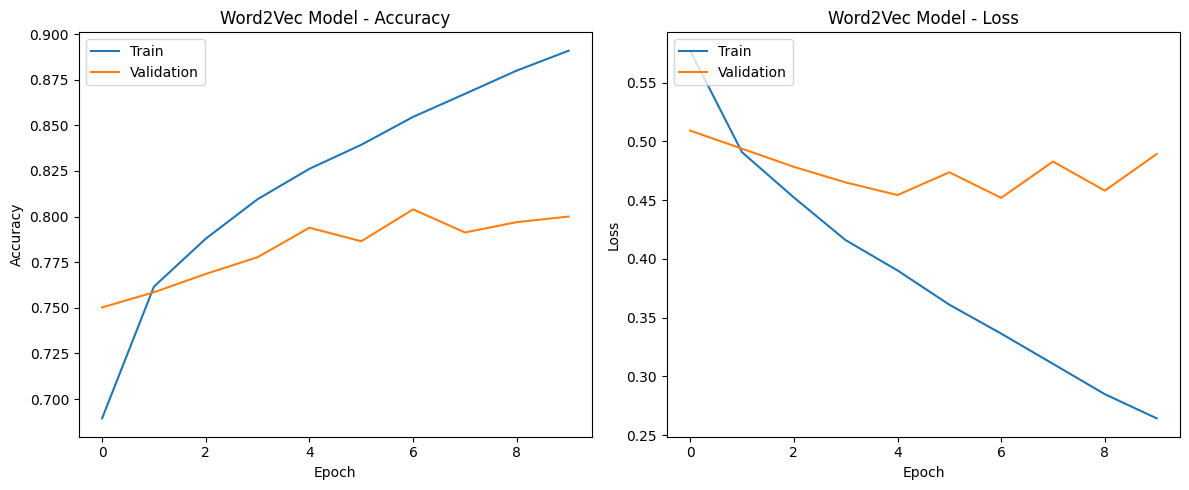

In [46]:
# Visualize the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_w2v.history['accuracy'])
plt.plot(history_w2v.history['val_accuracy'])
plt.title('Word2Vec Model - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_w2v.history['loss'])
plt.plot(history_w2v.history['val_loss'])
plt.title('Word2Vec Model - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


Evaluating Model with Word2Vec embeddings:
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Word2Vec Model Accuracy: 0.7911


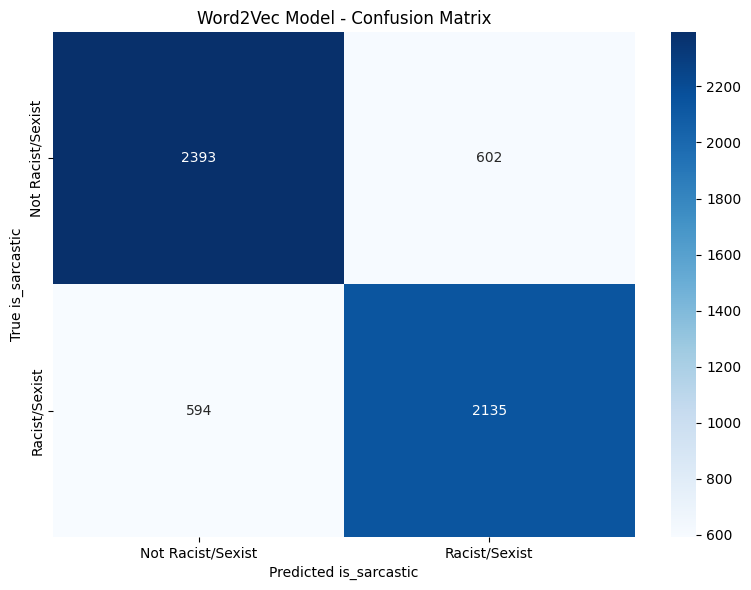


Word2Vec Model Classification Report:
                   precision    recall  f1-score   support

Not Racist/Sexist       0.80      0.80      0.80      2995
    Racist/Sexist       0.78      0.78      0.78      2729

         accuracy                           0.79      5724
        macro avg       0.79      0.79      0.79      5724
     weighted avg       0.79      0.79      0.79      5724



(0.7910552061495457,
 array([[0],
        [1],
        [1],
        ...,
        [0],
        [0],
        [1]]))

In [47]:
# Evaluate the Word2Vec model
print("\nEvaluating Model with Word2Vec embeddings:")
evaluate_model(best_model, X_test_pad, y_test, "Word2Vec Model")

In [48]:
!pip install gradio

In [49]:
import gradio as gr
import pickle

# Load the tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Assuming 'best_model' is your loaded Word2Vec model (from previous code)
# and 'max_len' is the maximum sequence length used during training

def predict_sarcasm(headline):
    headline_clean = preprocess_text(headline)  # Assuming 'preprocess_text' is your cleaning function
    headline_seq = tokenizer.texts_to_sequences([headline_clean])
    headline_pad = pad_sequences(headline_seq, padding='post', maxlen=25)  # Use max_len from your training
    prediction = best_model.predict(headline_pad)[0][0]
    return "Sarcastic" if prediction >= 0.5 else "Not Sarcastic"  # Adjust threshold if needed

# Create the Gradio Interface
interface = gr.Interface(
    fn=predict_sarcasm,
    inputs=gr.Textbox(lines=2, placeholder="Enter a headline..."),
    outputs="text",
    title="Sarcasm Detection",
    description="Enter a headline to detect if it's sarcastic or not."
)

# Launch in Colab
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d2e6c88c15455e282d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
